In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Cargar datos
datos = pd.read_csv(filepath_or_buffer = "C:/Users/carlo/cliente_tienda.csv")

In [3]:
# Preprocesar datos
data = datos[['Ingresos Anuales ($)', 'Porcentaje de gastos (1-100)']]
datos_normalizados = Normalizer().fit_transform(data)

In [4]:
X = datos_normalizados.copy()

In [5]:
# Realizar el agrupamiento jerárquico
modelo_jerarquico = AgglomerativeClustering(n_clusters=3)
modelo_jerarquico.fit(X)

AgglomerativeClustering(n_clusters=3)

In [6]:
# Etiquetas de los clusters
labels = modelo_jerarquico.labels_

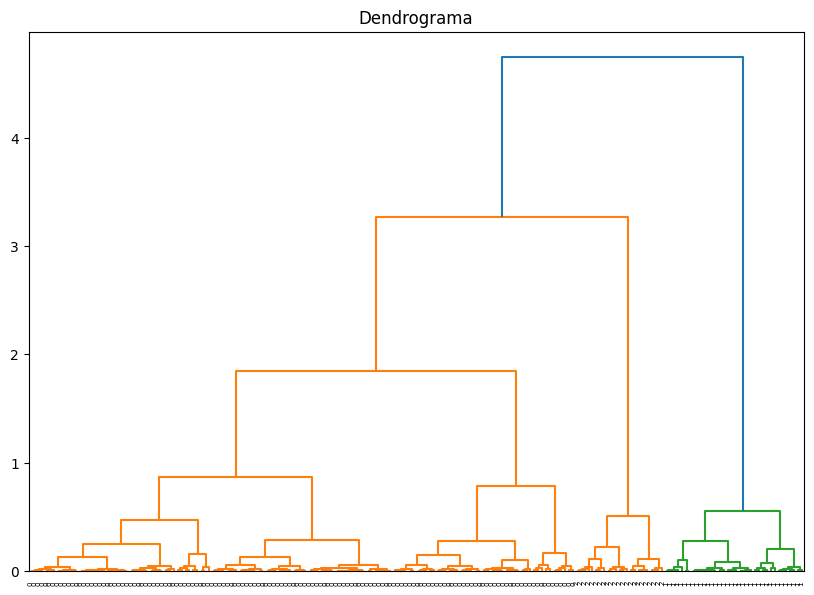

In [7]:
# Crear un dendrograma para visualizar la jerarquía
linked = linkage(X, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=labels, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.show()

In [8]:
# Asignación de colores
colores = ['red', 'green', 'blue']
asignar = [colores[label] for label in labels]

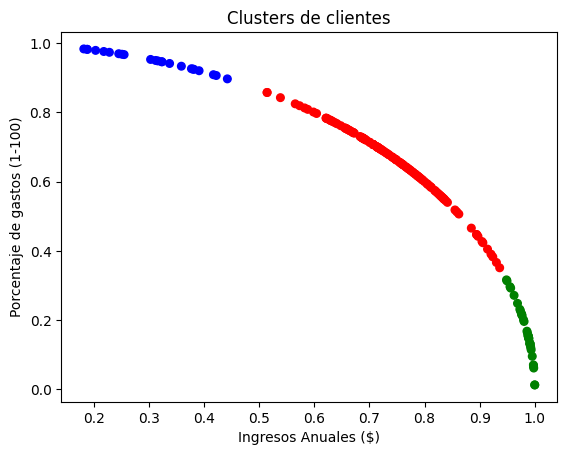

In [9]:
# Graficar los clusters
plt.scatter(X[:, 0], X[:, 1], c=asignar, s=30)
plt.title('Clusters de clientes')
plt.xlabel('Ingresos Anuales ($)')
plt.ylabel('Porcentaje de gastos (1-100)')
plt.show()

In [10]:
# Añadir los clusters al dataframe
data['cluster'] = labels

C:\Users\carlo\AppData\Local\Temp\ipykernel_17788\779764225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = labels


In [11]:
# Guardar los datos con los clusters
data.to_csv('clientes_agrupados.csv')